In [1]:
"""
使用heterograph() 构建异质图
data_dict: The dictionary data for constructing a heterogeneous graph. 
    数据格式(src_type, edge_type, dst_type) 
"""
import dgl
import torch
g = dgl.heterograph({
    ('user', 'follows', 'user'): (torch.tensor([1, 2]), torch.tensor([3, 4])),
    ('player', 'plays', 'game'): (torch.tensor([2, 2]), torch.tensor([1, 1]))
})
print(g)
g.ndata['x'] = {'game': torch.zeros(2, 1), 'player': torch.ones(3, 1)}
g.ndata['h']
g.ndata['h'] = {'game': torch.ones(2, 1)}
print(g.ndata['h'])
print(g)

[Using backend: pytorch21:38:03] /opt/dgl/src/runtime/tensordispatch.cc:43: TensorDispatcher: dlopen failed: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory



Graph(num_nodes={'game': 2, 'player': 3, 'user': 5},
      num_edges={('player', 'plays', 'game'): 2, ('user', 'follows', 'user'): 2},
      metagraph=[('player', 'game', 'plays'), ('user', 'user', 'follows')])
{'game': tensor([[1.],
        [1.]])}
Graph(num_nodes={'game': 2, 'player': 3, 'user': 5},
      num_edges={('player', 'plays', 'game'): 2, ('user', 'follows', 'user'): 2},
      metagraph=[('player', 'game', 'plays'), ('user', 'user', 'follows')])


In [1]:
'''
('user', 'follows', 'user'): 代表是三元组格式，紧跟着的值才是关键项，即 (torch.tensor([0, 1]), torch.tensor([1, 2]))
这条样例说明的是：节点0 和节点1都是user，user 1 follow user 2， 同理，可得出 user 1 follow user 2 ...
同上分析，可以得到整个图的形状如下：
'''
import dgl
import torch
data_dict = {
    ('user', 'follows', 'user'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
    ('user', 'follows', 'topic'): (torch.tensor([1, 1]), torch.tensor([1, 2])),
    ('user', 'plays', 'game'): (torch.tensor([0, 3]), torch.tensor([3, 4]))
}
g = dgl.heterograph(data_dict)
g

Using backend: pytorch[22:14:14] /opt/dgl/src/runtime/tensordispatch.cc:43: TensorDispatcher: dlopen failed: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory



Graph(num_nodes={'game': 5, 'topic': 3, 'user': 4},
      num_edges={('user', 'follows', 'topic'): 2, ('user', 'follows', 'user'): 2, ('user', 'plays', 'game'): 2},
      metagraph=[('user', 'topic', 'follows'), ('user', 'user', 'follows'), ('user', 'game', 'plays')])

(-0.5, 1015.5, 611.5, -0.5)

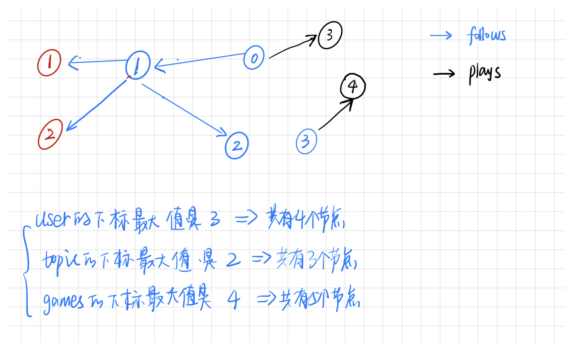

In [29]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片

sample = mpimg.imread('sample.png') # 读取和代码处于同一目录下的 lena.png
plt.figure(figsize = (10,10))
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴